# 6.4 Machine Learning

# Contents

1. Importing libraries 
2. Importing data
3. Data cleaning
4. Data prep for regression analysis
5. Regression analysis


# 1. Importing Libraries

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# 2. Importing Data

In [4]:
#Creating common folder path
path = r'C:\Users\Mukund\Desktop\Career Foundry\Covid-19 Vaccination Progress' 

In [5]:
path

'C:\\Users\\Mukund\\Desktop\\Career Foundry\\Covid-19 Vaccination Progress'

In [6]:
# Importing Corona vaccination Data
df_CVN = pd.read_csv(os.path.join(path, 'Data', 'Prepared_Data', 'Country_Vaccinations_Checked.csv'), index_col = False)

In [7]:
df_CVN.columns

Index(['Country', 'iso_code', 'Date', 'Total_No_Of_vaccinations',
       'Total_No_People_Vaccinated', 'Total_No_Of_People_Fully_Vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred',
       'Total_No_People_Vaccinated_Per_Hundred',
       'Total_No_OF_People_Fully_Vaccinated_Per_Hundred',
       'daily_vaccinations_per_million', 'vaccines', 'source_name',
       'source_website'],
      dtype='object')

In [9]:
df_CVN.shape

(36063, 15)

In [10]:
df_CVN.head()

,Country,iso_code,Date,Total_No_Of_vaccinations,Total_No_People_Vaccinated,Total_No_Of_People_Fully_Vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,Total_No_People_Vaccinated_Per_Hundred,Total_No_OF_People_Fully_Vaccinated_Per_Hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,22/02/2021,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,23/02/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,24/02/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,25/02/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,26/02/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


# 3. Data Cleaning

In [11]:
# Renaming the column names
df_CVN.rename(columns = {'Total_No_Of_vaccinations':'Total_Vaccinations',
                        'Total_No_People_Vaccinated':'Total_Ppl_Vaccinated', 'Total_No_Of_People_Fully_Vaccinated':'Total_Ppl_Fully_Vaccinated',
                         'Total_No_People_Vaccinated_Per_Hundred':'Total_ppl_Vaccinated_Per_Hundred',
                         'Total_No_OF_People_Fully_Vaccinated_Per_Hundred':'Total_ppl_Fully_Vaccinated_Per_Hundred'
                        }, inplace = True)

In [12]:
df_CVN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36063 entries, 0 to 36062
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 36063 non-null  object 
 1   iso_code                                36063 non-null  object 
 2   Date                                    36063 non-null  object 
 3   Total_Vaccinations                      20068 non-null  float64
 4   Total_Ppl_Vaccinated                    19150 non-null  float64
 5   Total_Ppl_Fully_Vaccinated              16302 non-null  float64
 6   daily_vaccinations_raw                  16553 non-null  float64
 7   daily_vaccinations                      35825 non-null  float64
 8   total_vaccinations_per_hundred          20068 non-null  float64
 9   Total_ppl_Vaccinated_Per_Hundred        19150 non-null  float64
 10  Total_ppl_Fully_Vaccinated_Per_Hundred  16302 non-null  fl

In [13]:
# Missing values
df_CVN.isnull().sum()

Country                                       0
iso_code                                      0
Date                                          0
Total_Vaccinations                        15995
Total_Ppl_Vaccinated                      16913
Total_Ppl_Fully_Vaccinated                19761
daily_vaccinations_raw                    19510
daily_vaccinations                          238
total_vaccinations_per_hundred            15995
Total_ppl_Vaccinated_Per_Hundred          16913
Total_ppl_Fully_Vaccinated_Per_Hundred    19761
daily_vaccinations_per_million              238
vaccines                                      0
source_name                                   0
source_website                                0
dtype: int64

We are going to check the relationship between Total_vaccinations(dependent variable) and Total_Ppl_Vaccinated (independent variable) and use them for regression analysis. We have got the strong correlation coefficient for these two variables from task 6.2. and we came up with below hypothesis:

If a person gets atleast one dose of vaccine(that is total number of vaccinated people) then the country will be more immune (the total number of vaccinations will also increase).

In [14]:
# Checking the mean value
df_CVN['Total_Ppl_Vaccinated'].mean() 


6722639.042140992

In [15]:
# Checking the median value
df_CVN['Total_Ppl_Vaccinated'].median() 

764670.0

In [16]:
# Checking the mean value
df_CVN['Total_Vaccinations'].mean() 

15018775.912896153

In [17]:
# Checking the median value
df_CVN['Total_Vaccinations'].median() 

1075853.0

In [18]:
# Since regression object throwing error for null values while fiting it into training dataset. 
# we can remove the null values for regression analysis by creating subset

df_Clean = df_CVN[df_CVN['Total_Vaccinations'].notnull() & df_CVN['Total_Ppl_Vaccinated'].notnull()]


In [19]:
df_Clean.isnull().sum()

Country                                      0
iso_code                                     0
Date                                         0
Total_Vaccinations                           0
Total_Ppl_Vaccinated                         0
Total_Ppl_Fully_Vaccinated                2761
daily_vaccinations_raw                    3275
daily_vaccinations                         199
total_vaccinations_per_hundred               0
Total_ppl_Vaccinated_Per_Hundred             0
Total_ppl_Fully_Vaccinated_Per_Hundred    2761
daily_vaccinations_per_million             199
vaccines                                     0
source_name                                  0
source_website                               0
dtype: int64

In [20]:
# Checking duplicate records
dups = df_Clean.duplicated()

In [21]:
dups.shape

(18997,)

No duplicate records found

In [23]:
# Exporting cleaned data set for further analysis
df_Clean.to_csv(os.path.join(path, 'Data', 'Prepared_Data', 'country_vaccinations_cleaned.csv'))

C:\Users\Mukund\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Vaccinations', ylabel='Density'>

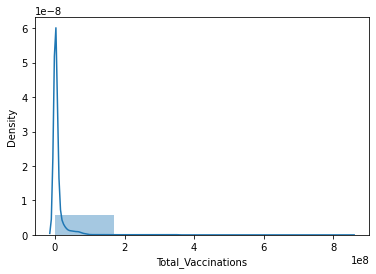

In [24]:
# Checking for extreme values
sns.distplot(df_Clean['Total_Vaccinations'], bins=5) 

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [25]:
df_Clean.shape

(18997, 15)

# 4. Data prep for regression analysis

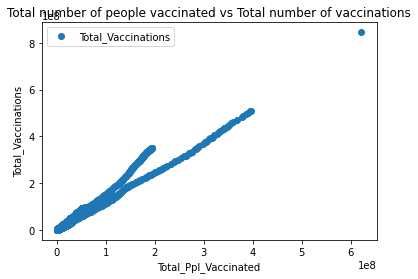

In [26]:
# Scatterplot using matplotlib to see how chosen variables plot against each other.
df_Clean.plot(x = 'Total_Ppl_Vaccinated', y='Total_Vaccinations',style='o') 
plt.title('Total number of people vaccinated vs Total number of vaccinations')  
plt.xlabel('Total_Ppl_Vaccinated')  
plt.ylabel('Total_Vaccinations')  
plt.show()

In [27]:
# Reshaping the variables into NumPy arrays and put them into separate objects.

X = df_Clean['Total_Ppl_Vaccinated'].values.reshape(-1,1)
y = df_Clean['Total_Vaccinations'].values.reshape(-1,1)

In [28]:
X

array([[      0.],
       [   8200.],
       [  54000.],
       ...,
       [1674710.],
       [1707671.],
       [1740598.]])

In [29]:
y

array([[      0.],
       [   8200.],
       [  54000.],
       ...,
       [2473590.],
       [2540555.],
       [2604265.]])

In [30]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5. Regression analysis

In [31]:
# Creating a regression object.

regression_obj = LinearRegression() 

In [32]:
# Fit the regression object onto the training set.

regression_obj.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predict the values of y using X.

y_predicted = regression_obj.predict(X_test)

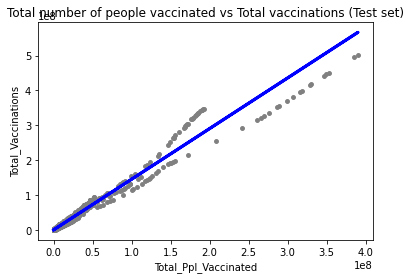

In [34]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='blue', linewidth =3)
plot_test.title('Total number of people vaccinated vs Total vaccinations (Test set)')
plot_test.xlabel('Total_Ppl_Vaccinated')
plot_test.ylabel('Total_Vaccinations')
plot_test.show()

The blue line here is regression line and we can see immediately that the linear model represented by the blue regression line  covers most of the data points. As the total number of vaccinated people increases the total number of vaccinations also increases. We can also check the model performance by its summary statistics.

In [35]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [36]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression_obj.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.451484]]
Mean squared error:  36890016800022.66
R2 score:  0.9709869115628275


1. Here a positive slope value indicates a positive relationship (as X rises, so does y).
2. Mean squared error value tells you how close a regression line is to a set of points. The larger the distance, the farther away the regression line is from the data points, indicating that the regression line isn’t an accurate representation of the data. and here the MSE value is very high to confirm that this regression may not be the best model to represent this data and can’t accurately predict the relation between the total vaccinations and total number of vaccinated people.
3. R2 score explains the variance in the data and it the value is near to 1 then its a good fit.

In [37]:
y_predicted

array([[3.65036636e+05],
       [1.31153588e+08],
       [1.38649528e+06],
       ...,
       [2.00554015e+06],
       [3.36115818e+05],
       [1.21305601e+06]])

In [38]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(50)

,Actual,Predicted
0,70249.0,3.650366e+05
1,118886610.0,1.311536e+08
2,1177187.0,1.386495e+06
3,396892.0,7.265360e+05
4,1255970.0,1.365752e+06
5,251973752.0,2.172279e+08
6,484003.0,7.383366e+05
7,12124.0,3.034487e+05
8,53342673.0,5.443742e+07
9,2062259.0,2.508105e+06


From the above actual and predicted values for total vaccinations, we can see that there is a major difference between these values and with this regression ananlysis, we can say that model wont be useful in explaining the relation between the two variables (total vaccinations and total number of people vaccinated). 

Compare how the regression fits the training set

In [39]:
# Predict.

y_predicted_train = regression_obj.predict(X_train)

In [40]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [41]:
print('Slope:' ,regression_obj.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.451484]]
Mean squared error:  36281274573803.65
R2 score:  0.971666543814212


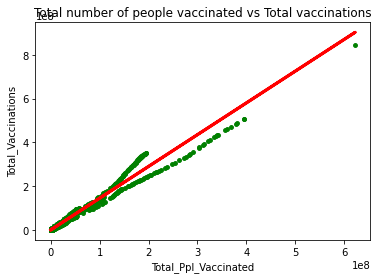

In [43]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total number of people vaccinated vs Total vaccinations')
plot_test.xlabel('Total_Ppl_Vaccinated')
plot_test.ylabel('Total_Vaccinations')
plot_test.show()

In [44]:
# Create a dataframe comparing the actual and predicted values of y for train.

data = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted_train.flatten()})
data.head(50)

,Actual,Predicted
0,6060135.0,5.270613e+06
1,245939.0,6.428275e+05
2,58255.0,3.704071e+05
3,242070.0,4.891574e+05
4,15308.0,2.999521e+05
5,2800019.0,3.352953e+06
6,1480949.0,2.070205e+06
7,46347278.0,4.971084e+07
8,2901017.0,3.275510e+06
9,798711.0,1.048578e+06


with the train data set as well, we can see the same prediction for the y values.